# Descriptive Statistics - Measures of Central Tendency and variability
Perform the following operations on any open source dataset (e.g., data.csv)
1. Provide summary statistics (mean, median, minimum, maximum, standard deviation) for
a dataset (age, income etc.) with numeric variables grouped by one of the qualitative
(categorical) variable. For example, if your categorical variable is age groups and
quantitative variable is income, then provide summary statistics of income grouped by
the age groups. Create a list that contains a numeric value for each response to the
categorical variable.
2. Write a Python program to display some basic statistical details like percentile, mean,
standard deviation etc. of the species of 'Iris-setosa', 'Iris-versicolor' and 'Iris-
versicolor' of iris.csv dataset.
Provide the codes with outnute and enlain everthing that you do in this sten

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import random

In [19]:
df=sns.load_dataset('iris')
# print(sns.get_dataset_names())
df.head()

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [4]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df.groupby('species').describe().stack(level=0)

count   mean       std  min    25%   50%    75%  max
species                                                                      
setosa     petal_length   50.0  1.462  0.173664  1.0  1.400  1.50  1.575  1.9
           petal_width    50.0  0.246  0.105386  0.1  0.200  0.20  0.300  0.6
           sepal_length   50.0  5.006  0.352490  4.3  4.800  5.00  5.200  5.8
           sepal_width    50.0  3.428  0.379064  2.3  3.200  3.40  3.675  4.4
versicolor petal_length   50.0  4.260  0.469911  3.0  4.000  4.35  4.600  5.1
           petal_width    50.0  1.326  0.197753  1.0  1.200  1.30  1.500  1.8
           sepal_length   50.0  5.936  0.516171  4.9  5.600  5.90  6.300  7.0
           sepal_width    50.0  2.770  0.313798  2.0  2.525  2.80  3.000  3.4
virginica  petal_length   50.0  5.552  0.551895  4.5  5.100  5.55  5.875  6.9
           petal_width    50.0  2.026  0.274650  1.4  1.800  2.00  2.300  2.5
           sepal_length   50.0  6.588  0.635880  4.9  6.225  6.50  6.900  7.9
           sepal_width    50.0  2.974  0.322497  2.2  2.800  3.00  3.175  3.8

In [20]:
variety_describe=df.groupby('species').agg({
    'petal_length':['mean','median','min','max','std','count'],
    'petal_width':['mean','median','min','max','std','count'],
    'sepal_length':['mean','median','min','max','std','count'],
    'sepal_width':['mean','median','min','max','std','count'],
})
variety_describe

petal_length                                  petal_width         \
                   mean median  min  max       std count        mean median   
species                                                                       
setosa            1.462   1.50  1.0  1.9  0.173664    50       0.246    0.2   
versicolor        4.260   4.35  3.0  5.1  0.469911    50       1.326    1.3   
virginica         5.552   5.55  4.5  6.9  0.551895    50       2.026    2.0   

                      ... sepal_length                      sepal_width  \
            min  max  ...          min  max       std count        mean   
species               ...                                                 
setosa      0.1  0.6  ...          4.3  5.8  0.352490    50       3.428   
versicolor  1.0  1.8  ...          4.9  7.0  0.516171    50       2.770   
virginica   1.4  2.5  ...          4.9  7.9  0.635880    50       2.974   

                                             
           median  min  max       std count  
species                                      
setosa        3.4  2.3  4.4  0.379064    50  
versicolor    2.8  2.0  3.4  0.313798    50  
virginica     3.0  2.2  3.8  0.322497    50  

[3 rows x 24 columns]

<Axes: >

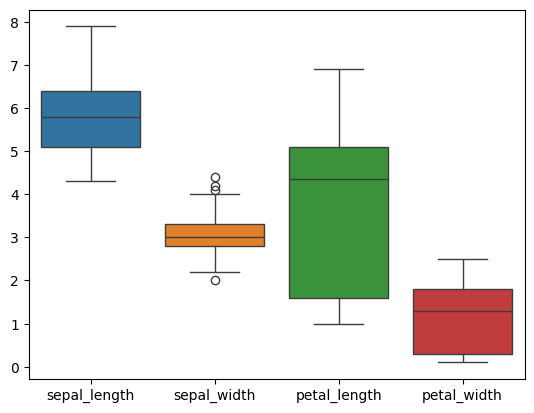

In [22]:
sns.boxplot(data=df)

# Age count and salary

In [11]:
age=[]
income=[]
for i in range(200):
    n=random.randint(18,60)
    age.append(n)
for i in range(200):
    n=random.randint(3000,60000)
    income.append(n)
data={
    'age':age,
    'income':income
}
df=pd.DataFrame(data)
df.head()

,age,income
0,29,49756
1,49,36006
2,56,16542
3,54,8453
4,24,3161


In [12]:
df['age'].mode()

0    33
Name: age, dtype: int64

In [9]:
df['age'].value_counts()

age
52    9
58    8
28    8
57    7
18    7
43    7
49    7
60    6
59    6
38    6
45    6
48    6
54    6
53    5
50    5
40    5
46    5
25    5
26    5
55    5
27    4
51    4
42    4
33    4
34    4
56    4
44    4
21    4
39    4
23    4
37    4
22    3
32    3
35    3
29    3
31    3
24    3
30    3
20    3
19    2
41    2
47    2
36    2
Name: count, dtype: int64

In [17]:
bins=[18,20,30,40,50,60]
labels=['18-20','20-30','30-40','40-50','50-60']
df['filtered_age']=pd.cut(df['age'],bins=bins,labels=labels,right=False)
summary=df.groupby('filtered_age')['income'].agg(['mean','min','max','median','std','count'])
# summary=df.groupby('filtered_age')['income'].describe()
summary
# df[df['age']==30]

C:\Users\USER\AppData\Local\Temp\ipykernel_15708\3703684016.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary=df.groupby('filtered_age')['income'].agg(['mean','min','max','median','std','count'])


,age,income,filtered_age
27,30,6941,20-30
92,30,18003,20-30
131,30,53503,20-30
